# Importing

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Import Dataset

# Importing Data

path = r'C:\Users\mkock\Desktop\Data Analytics\Data Immersion\Achievement 6\2022-05 Heart Disease Analysis'

df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Heart_2020_clean.csv'))

# Task: Question 2

What are the differences in heart disease cases between white males and white females?
    Variables: Race vs Sex 
    
What ages are the most susceptible to heart disease?
    Variables: HeartDisease vs AgeCategory

Which health factors contribute the most to heart disease?
    Variables: HeartDisease vs (BMI, Smoking, SleepTime)
                

# Task: Question 3

In [4]:
# Create a correlation matrix using pandas

df_heart.corr()

,Unnamed: 0,BMI,PhysicalHealth,MentalHealth,SleepTime
Unnamed: 0,1.000000,0.021257,0.011284,0.012797,-0.013633
BMI,0.021257,1.000000,0.103813,0.056724,-0.048653
PhysicalHealth,0.011284,0.103813,1.000000,0.279657,-0.058406
MentalHealth,0.012797,0.056724,0.279657,1.000000,-0.117078
SleepTime,-0.013633,-0.048653,-0.058406,-0.117078,1.000000


In [5]:
# Create a data subset

heart_subset = df_heart[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

In [6]:
heart_subset.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


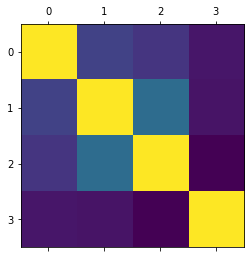

In [7]:
# Create a correlation heatmap using matplotlib

plt.matshow(heart_subset.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

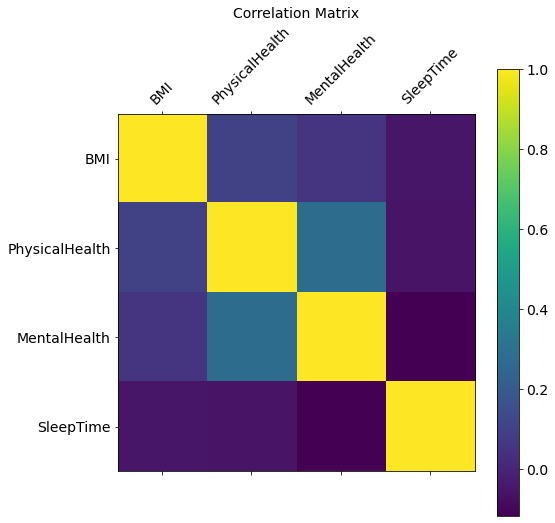

In [8]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(heart_subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(heart_subset.shape[1]), heart_subset.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(heart_subset.shape[1]), heart_subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

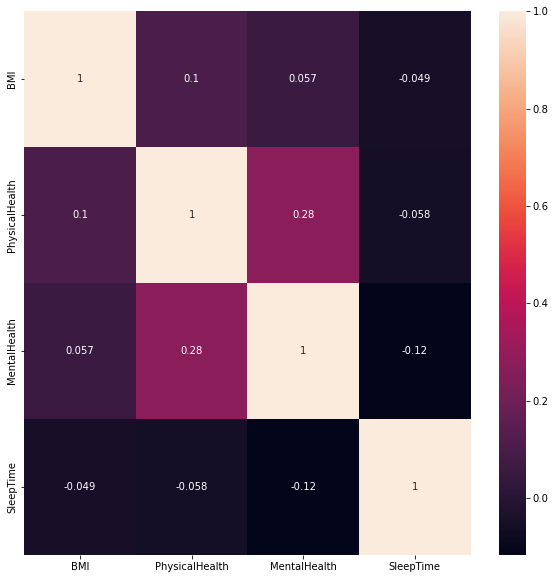

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(heart_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The strongest correlation is between PhysicalHealth and MentalHealth, next would be between BMI and PhysicalHealth. There is a weak correlation between both, however the correlation between PhysicalHealth and MentalHealth is much stronger compared to that of the correlation between BMI and PhysicalHealth

# Task: Question 4

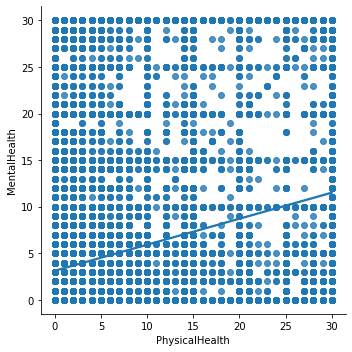

In [10]:
# Create a scatterplot for the "PhysicalHealth" and "MentalHealth" columns in seaborn

sns.lmplot(x = 'PhysicalHealth', y = 'MentalHealth', data = df_heart)

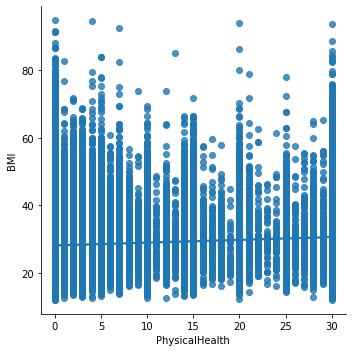

In [11]:
# Create a scatterplot for the "PhysicalHealth" and "BM" columns in seaborn

sns.lmplot(x = 'PhysicalHealth', y = 'BMI', data = df_heart)

# Task: Question 5

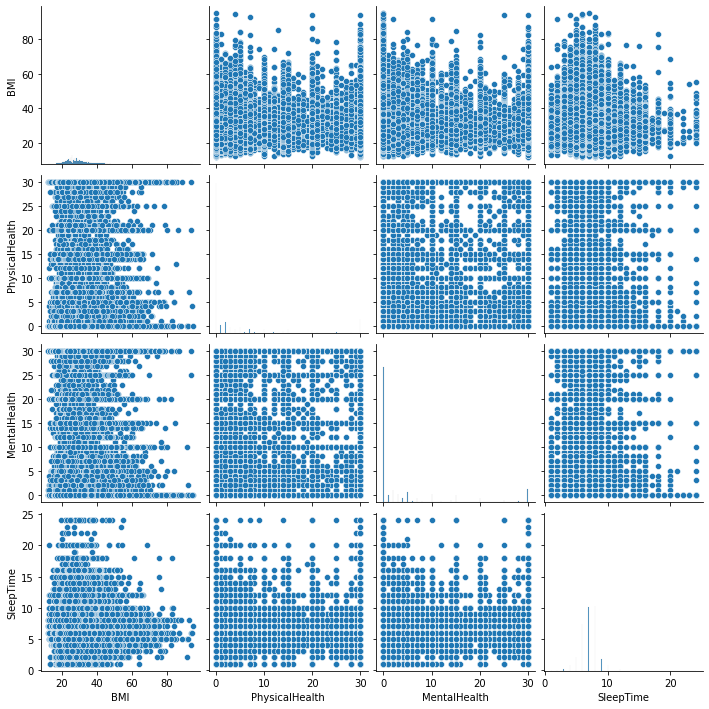

In [19]:
# Create a pair plot 

g = sns.pairplot(heart_subset)

Since the correlations and distributions between the variables are not good and they show very little information, I would like to explore some variables further in Excel, working with count of a variable instead of the variable itself. eg Count of the "yes" and "no" in HeartDisease compared to sex, in the same way, I want to compare HeartDisease so SleepTime, Smoking, BMI etc.

# Task: Question 6

In [ ]:
sns.histplot(df_heart['BMI'], bins = 20, kde = True)

Use actual categories in BMI calculations instead of self-determined bins

In [22]:
# Creating Categorical Flags

In [23]:
df_heart.loc[df_heart['BMI'] < 18.5, 'BMI Category'] = 'Low BMI'

In [24]:
df_heart.loc[(df_heart['BMI'] >= 18.5) & (df_heart['BMI'] < 25), 'BMI Category'] = 'Healthy BMI'

In [25]:
df_heart.loc[(df_heart['BMI'] >= 25) & (df_heart['BMI'] < 30), 'BMI Category'] = 'High BMI'

In [28]:
df_heart.loc[df_heart['BMI'] >= 30, 'BMI Category'] = 'Dangerously High BMI'

In [29]:
df_heart['BMI Category'].value_counts(dropna = False)

High BMI                105432
Dangerously High BMI    100344
Healthy BMI              90858
Low BMI                   5083
Name: BMI Category, dtype: int64

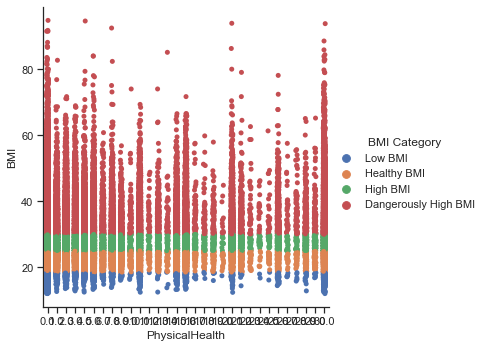

In [36]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g_1 = sns.catplot(x="PhysicalHealth", y="BMI", hue="BMI Category", data=df_heart)


In [37]:
# How can i change the lenght of the x axis?

Do futher analysis of data questions in excel